In [1]:
import cvxpy
import numpy as np

In [2]:
#the knapsack problem
# The data for the Knapsack problem
# P is total weight capacity of sack
# weights and utilities are also specified
P = 165
weights = np.array([23, 31, 29, 44, 53, 38, 63, 85, 89, 82])
utilities = np.array([92, 57, 49, 68, 60, 43, 67, 84, 87, 72])

In [14]:
len(weights)

10

In [15]:
#specify the boolean variables for integer optimization
selection = cvx.Variable(10, boolean=True)
# The sum of the weights should be less than or equal to P
weight_constraint = weights * selection <= P

# Our total utility is the sum of the item utilities
total_utility = utilities * selection

# We tell cvxpy that we want to maximize total utility 
# subject to weight_constraint. All constraints in 
# cvxpy must be passed as a list
knapsack_problem = cvxpy.Problem(cvxpy.Maximize(total_utility), [weight_constraint])

# Solving the problem
knapsack_problem.solve(solver=cvxpy.GLPK_MI)

309.0

In [16]:
knapsack_problem.value

309.0

We’ve specified that cvxpy should use the GLPK_MI solver in the solve method. This is a special solver designed for IP problems.

In [6]:
import cvxpy as cvx
# Create two scalar optimization variables.
x = cvx.Variable()
y = cvx.Variable()
# Create two constraints.
constraints = [x + y == 1,
x - y >= 1]
# Form objective.
obj = cvx.Minimize((x - y)**2)
# Form and solve problem.
prob = cvx.Problem(obj, constraints)
prob.solve() # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)

status: optimal
optimal value 1.0
optimal var 1.0 1.570086213240983e-22


In [7]:
x = cvx.Variable()

# An infeasible problem.
prob = cvx.Problem(cvx.Minimize(x), [x >= 1, x <= 0])
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

# An unbounded problem.
prob = cvx.Problem(cvx.Minimize(x))
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

status: infeasible
optimal value inf
status: unbounded
optimal value -inf


In [8]:
# Solves a bounded least-squares problem.

import cvxpy as cvx
import numpy

# Problem data.
m = 10
n = 5
numpy.random.seed(1)
A = numpy.random.randn(m, n)
b = numpy.random.randn(m)

# Construct the problem.
x = cvx.Variable(n)
objective = cvx.Minimize(cvx.sum_squares(A*x - b))
constraints = [0 <= x, x <= 1]
prob = cvx.Problem(objective, constraints)

print("Optimal value", prob.solve())
print("Optimal var")
print(x.value) # A numpy ndarray.

Optimal value 4.141338603672536
Optimal var
[-4.80085741e-21  5.90994300e-21  1.34643668e-01  1.24976681e-01
 -4.69974639e-21]


#Parameters are symbolic representations of constants. The purpose of parameters is to change the value of a constant in a problem without reconstructing the entire problem.

In [11]:
import cvxpy as cvx
import numpy
import matplotlib.pyplot as plt

# Problem data.
n = 15
m = 10
numpy.random.seed(1)
A = numpy.random.randn(n, m)
b = numpy.random.randn(n)
# gamma must be nonnegative due to DCP rules.
gamma = cvx.Parameter(nonneg=True)

# Construct the problem.
x = cvx.Variable(m)
error = cvx.sum_squares(A*x - b)
obj = cvx.Minimize(error + gamma*cvx.norm(x, 1))
prob = cvx.Problem(obj)

# Construct a trade-off curve of ||Ax-b||^2 vs. ||x||_1
sq_penalty = []
l1_penalty = []
x_values = []
gamma_vals = numpy.logspace(-4, 6)
for val in gamma_vals:
    gamma.value = val
    prob.solve()
    # Use expr.value to get the numerical value of
    # an expression in the problem.
    sq_penalty.append(error.value)
    l1_penalty.append(cvx.norm(x, 1).value)
    x_values.append(x.value)
print(x_values)

[array([-0.17823787,  0.33773981, -0.23499475,  0.12534639, -0.42465821,
       -0.00829154, -0.24445593,  0.19126016,  0.1926357 ,  0.1133424 ]), array([-0.17826541,  0.33771648, -0.23499035,  0.12532385, -0.42463773,
       -0.00827507, -0.24443841,  0.19126302,  0.19261624,  0.11333562]), array([-0.178309  ,  0.33767958, -0.23498346,  0.12528822, -0.42460531,
       -0.00824908, -0.24441074,  0.19126762,  0.19258544,  0.11332488]), array([-0.17837888,  0.33762044, -0.23497244,  0.12523114, -0.42455329,
       -0.00820732, -0.24436637,  0.19127498,  0.19253612,  0.11330772]), array([-0.17849077,  0.33752577, -0.23495482,  0.12513979, -0.42446995,
       -0.00814031, -0.24429535,  0.19128669,  0.19245722,  0.11328025]), array([-0.17866937,  0.33737459, -0.2349266 ,  0.12499382, -0.42433709,
       -0.00803382, -0.24418196,  0.19130557,  0.19233105,  0.11323631]), array([-0.17895519,  0.33713269, -0.23488153,  0.12476041, -0.42412392,
       -0.00786254, -0.2440003 ,  0.19133552,  0.19

Populating the interactive namespace from numpy and matplotlib


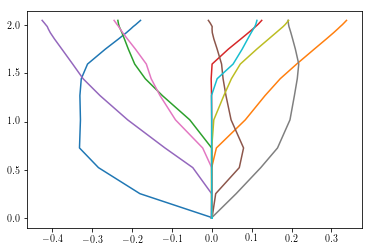

In [13]:
%pylab inline
plot(x_values,l1_penalty)